In [ ]:
# You learn how to do basic computer vision using a deep neuron network that matched the pixel of the image to a label
# So, it was matched to a numeric label but there was a limitation to it.
# So, the image you were looking at had to have subject centred in it and it had to be the only thing in the image.
# It won't be able to identify as it's not trained to know it except the ankle boot.
# So for that reason, we have to use something called "convolutional nueron network".
# So the idea behind a convulational neuron network, is filter the images b4 training them.
# After filtering the images, features within the images then can come to the forfront.
# Filter is simply a multipliers.

# Convolutions-2
# Filter that passes over image and then extract commonalities
# scan all pixel in pic and then look at its neighbouring neighbour. 
# Then multiply out the values of this pixels by the equivalent weights in the filter.
# In this case a 3x3 convolution is specified matrix.
# If you look at it, the current pixel is 192, but u can calculate the new ones by looking at the neighbour values.
# Multiplying them out by the values specified in the filter and making the new pixel the final amount.

# We will now explore convulation by how it works on 2d gray scale image

# Convolutions-3
# Ascent image

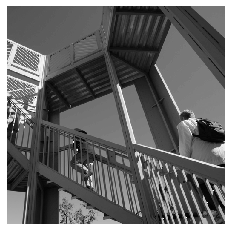

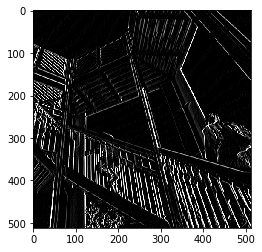

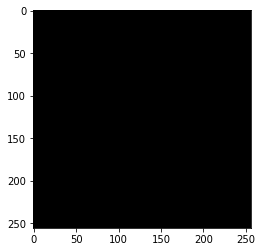

In [9]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()
# we use piplot library to draw the image so we know what it looks like.
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

# The image is stored as a numpy array. 
# So we can create a transformed image by just copying that array.
# We also need to get the dimensions of the image so we can look over it later.
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

# create the convolution now
# First, me make a convolution matrix or kernel as a 3x3 array
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight line
# Experiment with different values for fun effects
# Filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
# If all the digits in the filter don't add up to 0 or 1, you should probably do a weight to get it to do so.
# I.e if your weights are 1, 1, 1      1, 2, 1     1, 1, 1     
# They add up to 10, so you'll set a weight of 0.1 if you want to normalize them.

weight = 1

# We will iterate over the image
# Living a one pixel margin and multiply out each of the neighbours of the current pixel by the value defined in the filter
# So that means, the current pixel's neighbour above it and to the left will be multiplied by the top left item in the filter, vice versa
# We will then multiply the weight to ensure that the result is in the range of 0-255.
# We will load the new value into the transformed image.
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        output_pixel = 0.0
        output_pixel = output_pixel + (i[x-1, y-1]*filter[0][0])
        output_pixel = output_pixel + (i[x, y-1]*filter[0][1])
        output_pixel = output_pixel + (i[x+1, y-1]*filter[0][2])
        output_pixel = output_pixel + (i[x-1, y]*filter[1][0])
        output_pixel = output_pixel + (i[x, y]*filter[1][1])
        output_pixel = output_pixel + (i[x+1, y]*filter[1][2])
        output_pixel = output_pixel + (i[x-1, y+1]*filter[2][0])
        output_pixel = output_pixel + (i[x, y+1]*filter[2][1])
        output_pixel = output_pixel + (i[x+1, y+1]*filter[2][2])
        output_pixel = output_pixel * weight
        
        if (output_pixel < 0):
            output_pixel = 0
        if (output_pixel > 255):
            output_pixel = 255
        i_transformed[x, y] = output_pixel

# We'll examine the results
# We can plot the image to see the effect of passing this filter over it
# Plot the image!
# Note that the size of the axes, they are 512x512

plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
# plt.axes('off')
plt.show()

# Understanding pooling, as wekk as unsing convolution, pooling also helps us
# The goal is to reduce the overall amount of info in an image while maintainng the features that are detected as present
# MAXpooling
# Taking every neibouring ones and only presenting the highest one out to make a new image which is 1/4 smaller.

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(size_x, 2):
    for y in range(size_y,2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        pixels.sort(reverse = True)
        newImage[int(x)/2, int(y)/2] = pixels[0]
        
# Plot the image, the size of the axes is now 256 instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
# plt.axes('off')
plt.show()

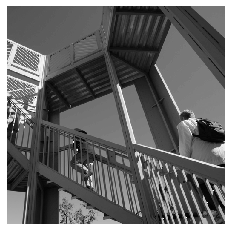

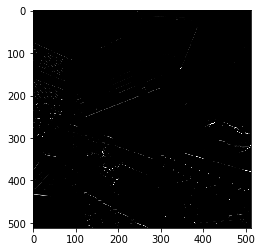

In [6]:
# Explore different values on your own and different size on your own. ie 5x5, 7x7

import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

filter = [[-1, 0, -1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        output_pixel = 0.0
        output_pixel = output_pixel + (i[x-1, y-1]*filter[0][0])
        output_pixel = output_pixel + (i[x, y-1]*filter[0][1])
        output_pixel = output_pixel + (i[x+1, y-1]*filter[0][2])
        output_pixel = output_pixel + (i[x-1, y]*filter[1][0])
        output_pixel = output_pixel + (i[x, y]*filter[1][1])
        output_pixel = output_pixel + (i[x+1, y]*filter[1][2])
        output_pixel = output_pixel + (i[x-1, y+1]*filter[2][0])
        output_pixel = output_pixel + (i[x, y+1]*filter[2][1])
        output_pixel = output_pixel + (i[x+1, y+1]*filter[2][2])
        output_pixel = output_pixel * weight
        
        if (output_pixel < 0):
            output_pixel = 0
        if (output_pixel > 255):
            output_pixel = 255
        i_transformed[x, y] = output_pixel

plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

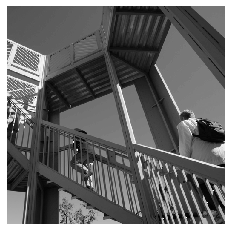

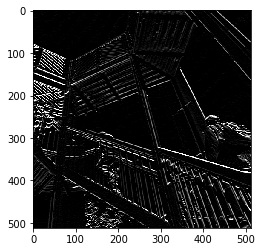

In [7]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

filter = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]

weight = 1

for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        output_pixel = 0.0
        output_pixel = output_pixel + (i[x-1, y-1]*filter[0][0])
        output_pixel = output_pixel + (i[x, y-1]*filter[0][1])
        output_pixel = output_pixel + (i[x+1, y-1]*filter[0][2])
        output_pixel = output_pixel + (i[x-1, y]*filter[1][0])
        output_pixel = output_pixel + (i[x, y]*filter[1][1])
        output_pixel = output_pixel + (i[x+1, y]*filter[1][2])
        output_pixel = output_pixel + (i[x-1, y+1]*filter[2][0])
        output_pixel = output_pixel + (i[x, y+1]*filter[2][1])
        output_pixel = output_pixel + (i[x+1, y+1]*filter[2][2])
        output_pixel = output_pixel * weight
        
        if (output_pixel < 0):
            output_pixel = 0
        if (output_pixel > 255):
            output_pixel = 255
        i_transformed[x, y] = output_pixel

plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

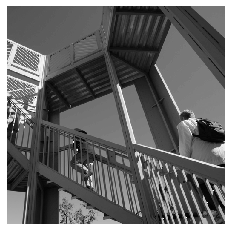

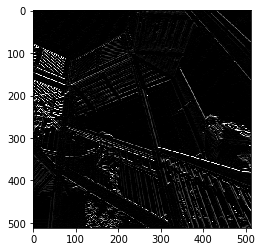

In [8]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

filter = [[0, 1, -1], [0, 2, -2], [0, 1, -1]]

weight = 1

for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        output_pixel = 0.0
        output_pixel = output_pixel + (i[x-1, y-1]*filter[0][0])
        output_pixel = output_pixel + (i[x, y-1]*filter[0][1])
        output_pixel = output_pixel + (i[x+1, y-1]*filter[0][2])
        output_pixel = output_pixel + (i[x-1, y]*filter[1][0])
        output_pixel = output_pixel + (i[x, y]*filter[1][1])
        output_pixel = output_pixel + (i[x+1, y]*filter[1][2])
        output_pixel = output_pixel + (i[x-1, y+1]*filter[2][0])
        output_pixel = output_pixel + (i[x, y+1]*filter[2][1])
        output_pixel = output_pixel + (i[x+1, y+1]*filter[2][2])
        output_pixel = output_pixel * weight
        
        if (output_pixel < 0):
            output_pixel = 0
        if (output_pixel > 255):
            output_pixel = 255
        i_transformed[x, y] = output_pixel

plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()